In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
from sklearn.metrics.pairwise import rbf_kernel
from functools import partial
from scipy.linalg import lstsq

In [3]:
from solvers import prepare_fdm_poisson_solve,prepare_GP_solver,prepare_solve_poisson_fdm_inhomogeneus,prepare_spectral_poisson_solve

sin(4*pi*x)*sin(2*pi*y)
-20*pi**2*sin(4*pi*x)*sin(2*pi*y)


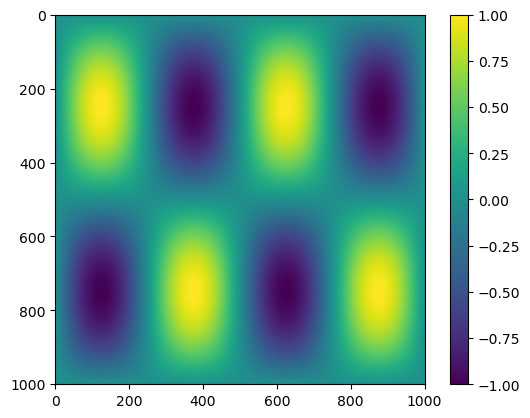

In [4]:

#create a symbolic function u, compute its laplacian and use this as the right hand side
x,y=sympy.symbols('x y')
u=sympy.sin(2*2*sympy.pi*x)*sympy.sin(2*sympy.pi*y)
#u=sin(2*sympy.pi*x*sympy.exp(3*sin(pi*x)))*sin(4*pi*sin(pi*y))
#u=sin(pi*x)*sin(pi*y)
freq_coeff=2
#u=sin((exp(freq_coeff*sin(pi*x))-1))*sin((exp(freq_coeff*sin(pi*y))-1))
assert u.subs(x,0)==0 ,print(u.subs(x,0))
assert u.subs(x,1)==0 ,print(u.subs(x,1))
assert u.subs(y,0)==0 ,print(u.subs(y,0))
assert u.subs(y,1)==0 ,print(u.subs(y,1))
print(u)
uxx=sympy.diff(u,x,x)
uyy=sympy.diff(u,y,y)
print(uxx+uyy)
uxx=sympy.lambdify((x,y),uxx,'numpy')
u=sympy.lambdify((x,y),u,'numpy')
uyy=sympy.lambdify((x,y),uyy,'numpy')

f=lambda x: uxx(x[0],x[1])+uyy(x[0],x[1])




N_target=1000

x = np.linspace(0,1,N_target+1,endpoint=True,dtype=np.float64)
y = np.linspace(0,1,N_target+1,endpoint=True,dtype=np.float64)
X,Y = np.meshgrid(x,y)
u_truth=u(X,Y)


plt.figure()
plt.imshow(u_truth)
plt.colorbar()
plt.show()

In [5]:
solver_fdm_asym_left=prepare_solve_poisson_fdm_inhomogeneus(
    N1=55,
    N2=55,
    L1=0.4,
    L2=0.6)
solver_fdm_asym_right=prepare_solve_poisson_fdm_inhomogeneus(
    N1=55,
    N2=55,
    L1=0.6,
    L2=0.4)
solver_fdm=prepare_fdm_poisson_solve(N=1000)
solver_GP=prepare_GP_solver(N=1000,N_target_fixed=1000)
solver_spectral=prepare_spectral_poisson_solve(N=100)
solvers=[solver_fdm_asym_left,solver_fdm_asym_right,solver_fdm,solver_GP,solver_spectral]

In [6]:
names=['fdm_asym_left','fdm_asym_right','fdm','GP','spectral']

In [7]:
sols=[]
start=time.time()
for solver,name in zip(solvers,names):
    sols.append(solver(f,N_target))
    print(name,time.time()-start)
    start=time.time()

fdm_asym_left 0.0716545581817627
fdm_asym_right 0.06252646446228027
fdm 0.18580389022827148
GP 9.164875030517578
spectral 0.0843656063079834


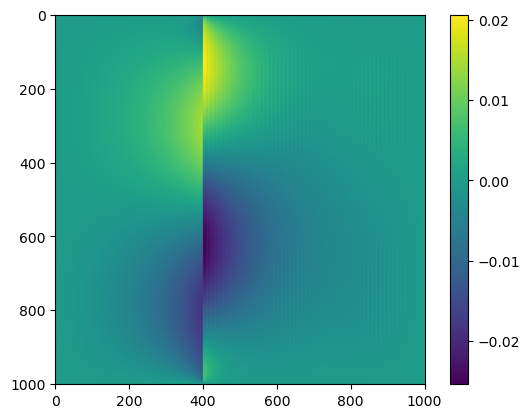

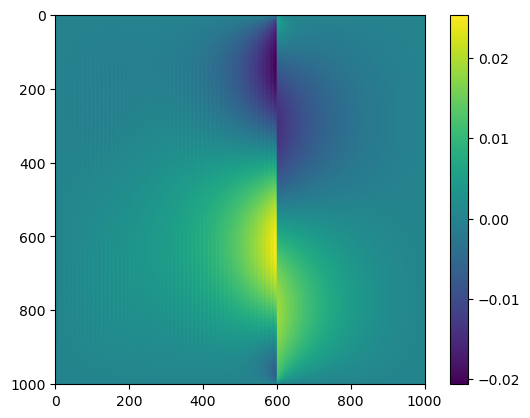

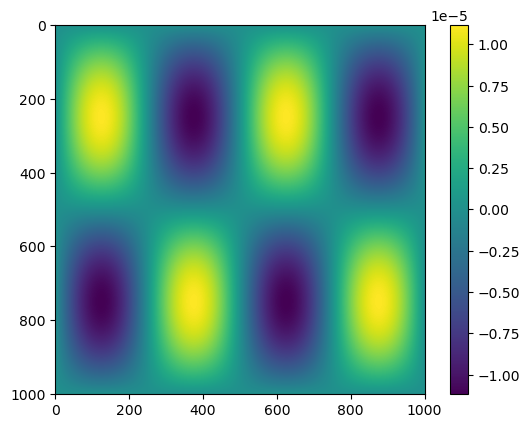

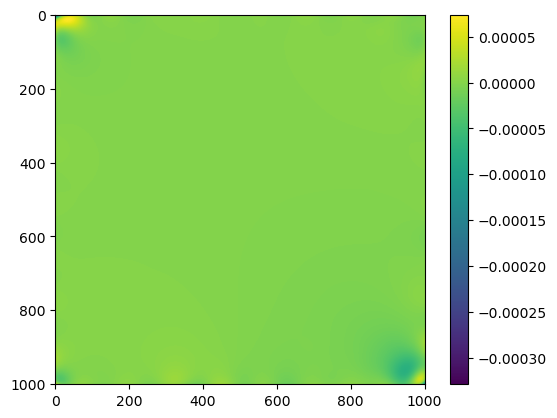

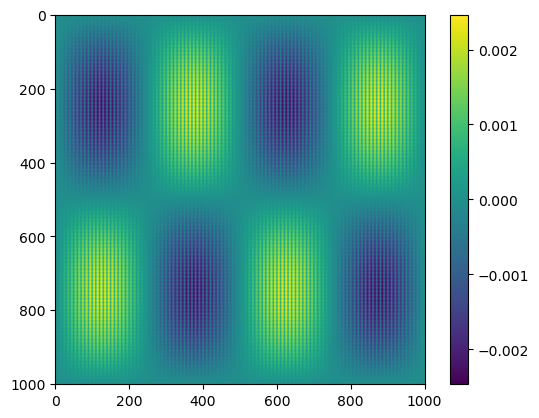

In [8]:
for sol in sols:
    plt.figure()
    plt.imshow(sol-u_truth)
    plt.colorbar()
    plt.show()

In [9]:
def plot_vectorized_function(f,mesh_size=0.01):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = y = np.arange(0.0, 1.0, mesh_size)
    X, Y = np.meshgrid(x, y)
    Z=f(np.stack([X.flatten(),Y.flatten()],axis=-1)).reshape(X.shape)

    ax.plot_surface(X, Y, Z)

    ax.set_xlabel('x1')
    ax.set_ylabel('y1')
    return fig

def plot_function(f):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = y = np.arange(0.0, 1.0, 0.01)
    X, Y = np.meshgrid(x, y)
    zs = np.array([f(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)

    ax.plot_surface(X, Y, Z)

    ax.set_xlabel('x1')
    ax.set_ylabel('y1')
    return fig


In [10]:
def vec(theta):
    return np.array([np.cos(theta),np.sin(theta)])
dir=vec(np.random.rand()*2*np.pi)
dir=vec(2*np.pi/4)
point=np.random.rand(2)
#point=np.array([0.5,0.5])

sin(5*exp(-100.0*(x - 0.244319777149959)**2))
-5*(200.0*x - 48.8639554299919)*(1000.0*x - 244.319777149959)*exp(-200.0*(x - 0.244319777149959)**2)*sin(5*exp(-100.0*(x - 0.244319777149959)**2)) + (200.0*x - 48.8639554299919)*(1000.0*x - 244.319777149959)*exp(-100.0*(x - 0.244319777149959)**2)*cos(5*exp(-100.0*(x - 0.244319777149959)**2)) - 1000.0*exp(-100.0*(x - 0.244319777149959)**2)*cos(5*exp(-100.0*(x - 0.244319777149959)**2))


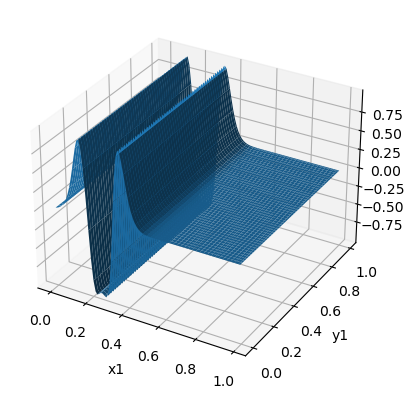

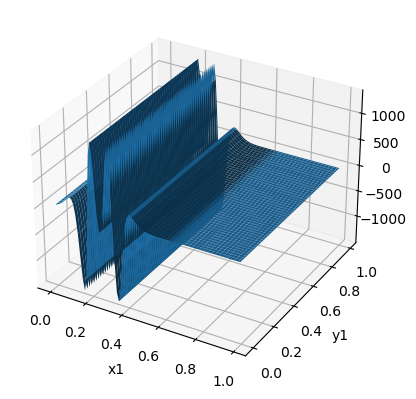

In [11]:
#create a symbolic function u, compute its laplacian and use this as the right hand side
x,y=sympy.symbols('x y')

type1=(1+5/(1+sympy.exp(-10*(x*dir[0]+y*dir[1]-0.5))))*(5+sympy.sin(4*sympy.pi*(x*dir[1]-y*dir[0])))

moving_spike=sympy.sin(5*sympy.exp(-((x-point[0])**2+(y-point[1])**2)/0.01))
pos=0.05
coeff=200
block=1/(1+sympy.exp(-coeff*(x-pos)))*1/(1+sympy.exp(-coeff*(y-pos)))*1/(1+sympy.exp(coeff*(x-(1-pos))))*1/(1+sympy.exp(coeff*(y-(1-pos))))
left_side_step=1/(1+sympy.exp(-coeff*(x-pos)))*1/(1+sympy.exp(-coeff*(y-pos)))*1/(1+sympy.exp(coeff*(x-(0.3))))*1/(1+sympy.exp(coeff*(y-(1-pos))))
u=sympy.sin(5*sympy.exp(-((x-point[0])**2)/0.01))
#u=sin(2*sympy.pi*x*sympy.exp(3*sin(pi*x)))*sin(4*pi*sin(pi*y))
#u=sin(pi*x)*sin(pi*y)
freq_coeff=2
#u=sin((exp(freq_coeff*sin(pi*x))-1))*sin((exp(freq_coeff*sin(pi*y))-1))

print(u)
uxx=sympy.diff(u,x,x)
uyy=sympy.diff(u,y,y)
print(uxx+uyy)
uxx=sympy.lambdify((x,y),uxx,'numpy')
u=sympy.lambdify((x,y),u,'numpy')
uyy=sympy.lambdify((x,y),uyy,'numpy')

f=lambda x: uxx(x[0],x[1])+uyy(x[0],x[1])

fig = plot_function(u)
fig2=plot_function(lambda x,y:f((x,y)))

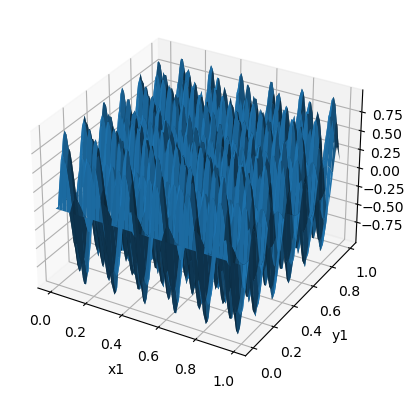

In [12]:
#create a symbolic function u, compute its laplacian and use this as the right hand side
x,y=sympy.symbols('x y')

def make_u_f(range_int=10):
    x,y=sympy.symbols('x y')
    u=sympy.sin(np.random.randint(1,range_int)*2*sympy.pi*x)*sympy.sin(np.random.randint(1,range_int)*2*sympy.pi*y)
    uxx=sympy.diff(u,x,x)
    uyy=sympy.diff(u,y,y)
    uxx=sympy.lambdify((x,y),uxx,'numpy')
    u=sympy.lambdify((x,y),u,'numpy')
    uyy=sympy.lambdify((x,y),uyy,'numpy')
    f=lambda x: uxx(x[0],x[1])+uyy(x[0],x[1])
    return u,f

def sample_from_u(u,N):
    x = np.linspace(0,1,N+1,endpoint=True,dtype=np.float64)
    y = np.linspace(0,1,N+1,endpoint=True,dtype=np.float64)
    X,Y = np.meshgrid(x,y)
    return u(X,Y)

u,f=make_u_f()
fig = plot_function(u)

In [17]:
UF=[make_u_f() for _ in range(100)]
U=np.stack([uf[0] for uf in UF],axis=0)
F=np.stack([uf[1] for uf in UF],axis=0)


Y=np.stack([sample_from_u(u_i,1000) for u_i in U],axis=0)


In [13]:
Y.shape

(100, 1001, 1001)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)

In [15]:
pca.fit(Y.reshape(Y.shape[0],-1))

PCA(n_components=60)

In [16]:
print(pca.explained_variance_ratio_)

[4.98900788e-02 4.09165303e-02 3.93133370e-02 3.06873977e-02
 3.06873977e-02 3.06873977e-02 3.06873977e-02 3.06873977e-02
 3.06873977e-02 2.73701051e-02 2.04582651e-02 2.04582651e-02
 2.04582651e-02 2.04582651e-02 2.04582651e-02 2.04582651e-02
 2.04582651e-02 2.04582651e-02 2.04582651e-02 2.04582651e-02
 2.04582651e-02 2.04582651e-02 2.04582651e-02 2.04582651e-02
 2.04582651e-02 2.04582651e-02 2.04582651e-02 2.04582651e-02
 1.39502106e-02 1.02291326e-02 1.02291326e-02 1.02291326e-02
 1.02291326e-02 1.02291326e-02 1.02291326e-02 1.02291326e-02
 1.02291326e-02 1.02291326e-02 1.02291326e-02 1.02291326e-02
 1.02291326e-02 1.02291326e-02 1.02291326e-02 1.02291326e-02
 1.02291326e-02 1.02291326e-02 1.02291326e-02 1.02291326e-02
 1.02291326e-02 1.02291326e-02 1.02291326e-02 1.02291326e-02
 1.02291326e-02 1.02291326e-02 1.02291326e-02 1.02291326e-02
 1.41156617e-32 7.93851522e-33 3.86866990e-33 3.78358614e-33]


In [17]:
Y_components=pca.transform(Y.reshape(Y.shape[0],-1))

In [18]:
t=(1,2,3,4)
(*Y.shape,5)

(100, 1001, 1001, 5)

In [19]:
model_values=np.stack([np.stack([solver(f,N_target=1000) for solver in solvers]) for f in tqdm(F)])
model_transforms=pca.transform(model_values.reshape(model_values.shape[0]*model_values.shape[1],-1)).reshape(model_values.shape[0],model_values.shape[1],60)

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
model_transforms.shape

(100, 5, 60)

In [ ]:
l=np.sqrt(np.mean([np.linalg.norm(sample_from_u(lambda x,y:fi([x,y]),1000))**2 for fi in F]))

In [ ]:
l

1499440.7651980314

In [13]:


def gaussian_separable_kernel(Ffunctions,Gfunctions,mat,l):
    F_vals=np.stack([sample_from_u(lambda x,y:fi([x,y]),1000) for fi in Ffunctions])
    if Gfunctions is not None:
        G_vals=np.stack([sample_from_u(lambda x,y:fi([x,y]),1000) for fi in Gfunctions])
    else:
        G_vals=F_vals
    K1=rbf_kernel(F_vals.reshape(F_vals.shape[0],-1),G_vals.reshape(G_vals.shape[0],-1),gamma=1/(2*l**2))

    return K1[:,:,None,None]*mat[None,None,:,:]+1

my_kernel=partial(gaussian_separable_kernel,mat=np.eye(len(solvers)),l=1499440.7651980314)

In [ ]:
kernel_matrix=my_kernel(F,None)
kernel_matrix+=1

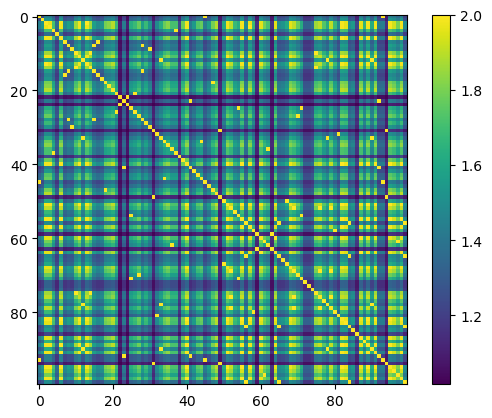

In [ ]:
plt.imshow(kernel_matrix[:,:,0,0])
plt.colorbar()

In [ ]:
to_invert=np.einsum("ijkl,ikm->ijlm", kernel_matrix, model_transforms)
to_invert = to_invert.reshape(to_invert.shape[0],to_invert.shape[1]*to_invert.shape[2],to_invert.shape[3])

In [ ]:
kernel_matrix.shape

(100, 100, 5, 5)

In [ ]:
model_transforms.shape

(100, 5, 60)

In [ ]:
to_invert.shape

(100, 500, 60)

In [ ]:
errors=Y_components[:,None,:]-model_transforms

In [ ]:
to_invert_2=np.einsum("ijkl,ikm->ikjlm", kernel_matrix, errors)
to_invert_2=to_invert_2.reshape(to_invert_2.shape[0]*to_invert_2.shape[1],to_invert_2.shape[2]*to_invert_2.shape[3],to_invert_2.shape[4])

In [ ]:
to_invert_2.shape

(500, 500, 60)

In [ ]:
def regularized_lstsq(A, y, reg=1e-10):
    A2 = np.concatenate([A, np.sqrt(reg) * np.eye(A.shape[1])], axis=0)
    y2 = np.concatenate([y, np.zeros(A.shape[1])], axis=0)
    return lstsq(A2, y2)[0]

In [ ]:
cov_regularizer=10
alpha=1

In [ ]:
Vs=[]
for i in range(Y_components.shape[-1]):
    A=np.concatenate(
        [to_invert[:,:,i], np.sqrt(cov_regularizer) * to_invert_2[:,:,i]], axis=0
    )
    Y_to_solve=np.concatenate(
        [Y_components[:,i], np.zeros(to_invert_2.shape[1])], axis=0
    )
    V = regularized_lstsq(
            A, Y_to_solve, reg=alpha * Y_to_solve.shape[0]
        )
    Vs.append(V.reshape(-1, 5))
Vs=np.stack(Vs,axis=-1)

In [ ]:
Vs.shape

(100, 5, 60)

In [ ]:
UF_to_test=[make_u_f() for _ in range(10)]
U_to_test=np.stack([uf[0] for uf in UF_to_test],axis=0)
F_to_test=np.stack([uf[1] for uf in UF_to_test],axis=0)



In [ ]:
Y_components_to_test=pca.transform(np.stack([sample_from_u(u_i,1000) for u_i in U_to_test],axis=0).reshape(U_to_test.shape[0],-1))

In [ ]:
kernel_to_test=my_kernel(F,F_to_test)+1

In [ ]:
model_values_to_test=np.stack([np.stack([solver(f,N_target=1000) for solver in solvers]) for f in tqdm(F_to_test)])
model_transforms_to_test=pca.transform(model_values_to_test.reshape(model_values_to_test.shape[0]*model_values_to_test.shape[1],-1)).reshape(model_values_to_test.shape[0],model_values_to_test.shape[1],60)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
alpha = np.einsum("ijp,ikjm->mkp", Vs, kernel_to_test)
pred_aggregate = np.einsum("ijp,jip->jp", alpha, model_transforms_to_test)

In [ ]:
alpha.shape

(5, 10, 60)

In [ ]:
aggregate=pca.inverse_transform(pred_aggregate)

In [ ]:
#np.linalg.norm(pred_aggregate-Y_components,axis=-1)

In [ ]:
aggregate.shape

(10, 1002001)

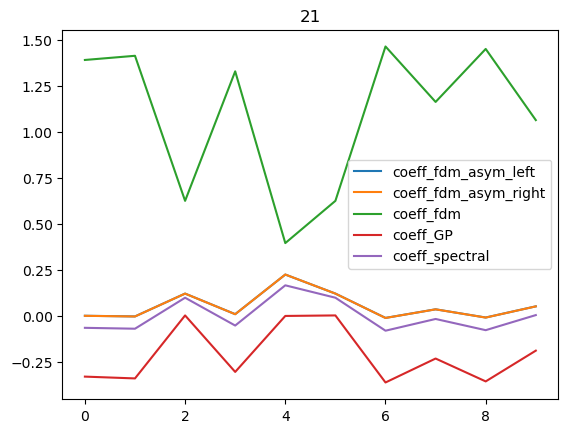

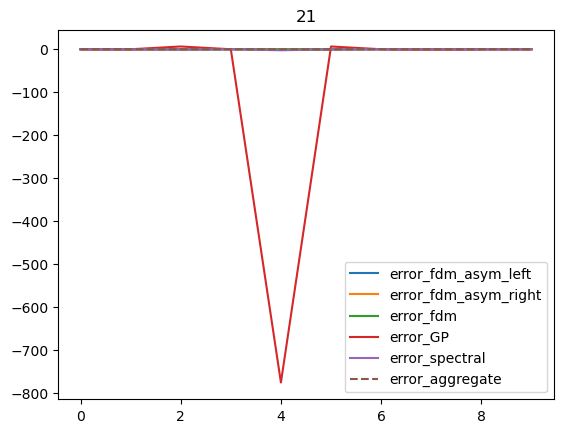

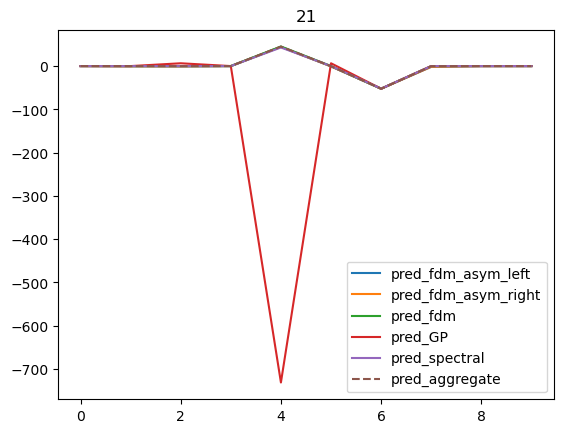

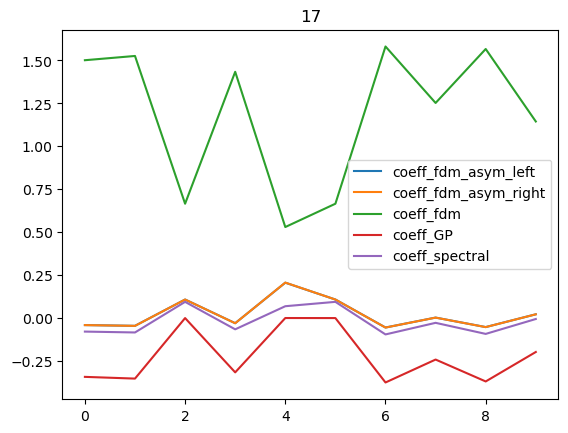

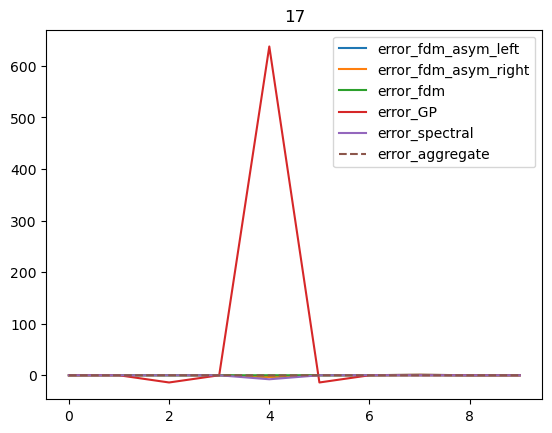

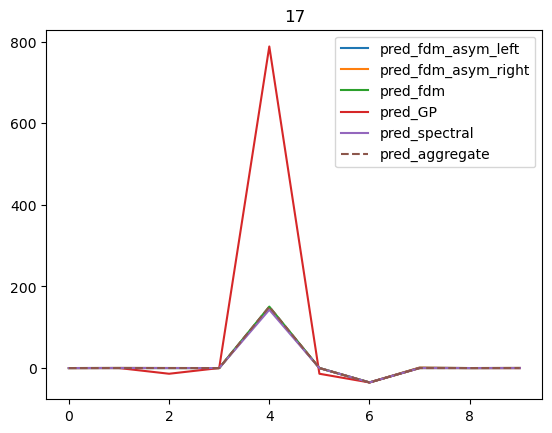

In [ ]:
for freq in np.random.randint(0,60,2):
    plt.figure()
    for i in range(5):
        plt.plot(alpha[i,:,freq],label='coeff_'+names[i])
    plt.legend()
    plt.title(f'{freq}')
    plt.figure()
    for i in range(5):
        plt.plot(model_transforms_to_test[:,i,freq]-Y_components_to_test[:,freq],label='error_'+names[i])
    plt.plot(pred_aggregate[:,freq]-Y_components_to_test[:,freq],label='error_aggregate',linestyle='--')
    #plt.ylim(-1,1)
    plt.legend()
    plt.title(f'{freq}')
    plt.figure()
    for i in range(5):
        plt.plot(model_transforms_to_test[:,i,freq],label='pred_'+names[i])
    plt.plot(pred_aggregate[:,freq],label='pred_aggregate',linestyle='--')
    #plt.ylim(-1,1)
    plt.legend()
    plt.title(f'{freq}')

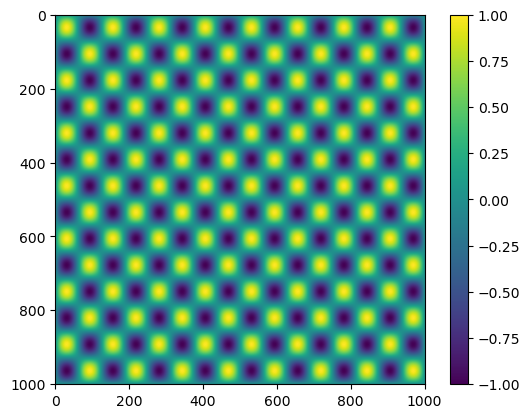

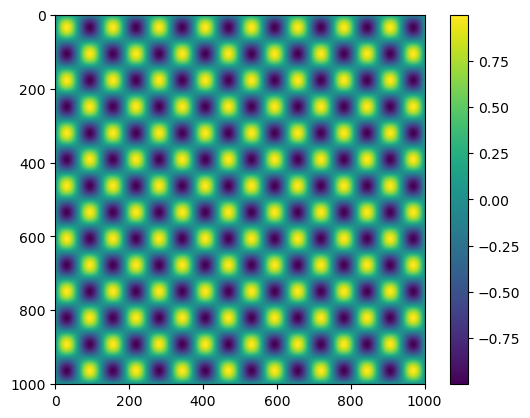

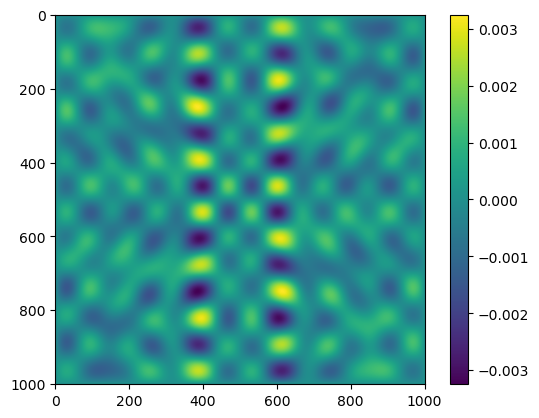

In [ ]:
index=5
plt.imshow(aggregate[5].reshape(1001,1001))
plt.colorbar()
plt.figure()
plt.imshow(sample_from_u(U_to_test[5],1000))
plt.colorbar()
plt.figure()
plt.imshow(aggregate[5].reshape(1001,1001)-sample_from_u(U_to_test[5],1000))
plt.colorbar()

In [14]:
from aggregate_solvers import Agregator

In [15]:
agg=Agregator(K=my_kernel, solvers=solvers,kernel_name='gaussian',PCA_covariance_ratio=0.95)

In [18]:
agg.fit(F,Y)

  0%|          | 0/100 [00:00<?, ?it/s]

AssertionError: 